# Experiment: Cohesion
To goal of cohesion is to maintain a cohesive collective whose network structure is neither too dense nor too sparse.

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = [12, 8]

import math
import numpy as np

from interaction import Interaction
from environment import Environment
from fish import Fish
from channel import Channel
from observer import Observer

from utils import generate_distortion, generate_fish, run_simulation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Dispersion
All robots start in the same place and have too many neighbors. They disperse to decrease their number of neighbors.

Please wait patiently 10 seconds. Thanks.
It's time to say bye bye!


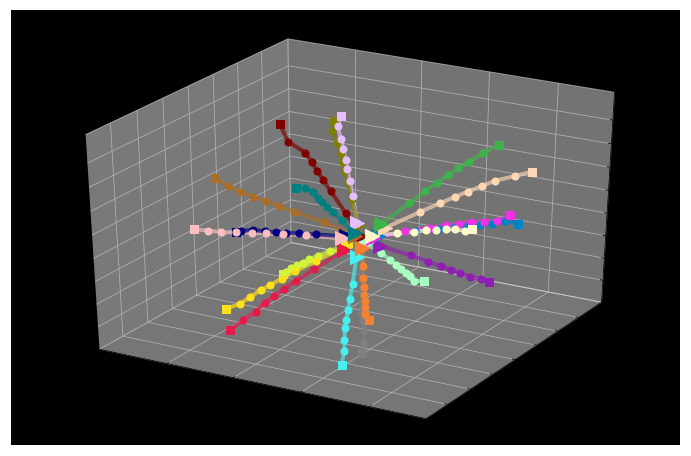

In [8]:
run_time = 10 # in seconds
num_fish = 20
arena_size = 50
arena_center = arena_size / 2.0
initial_spread = 1
fish_pos = initial_spread * np.random.rand(num_fish, 3) + arena_center - initial_spread / 2.0
clock_freqs = 1
verbose = False

distortion = generate_distortion(type='none', n=arena_size, show=False)
environment = Environment(
    node_pos=fish_pos,
    distortion=distortion,
    prob_type='binary',
    noise_magnitude=0,
    conn_thres=6,
    verbose=verbose
)
interaction = Interaction(environment, verbose=verbose)
channel = Channel(environment)

fish = generate_fish(
    n=num_fish, 
    channel=channel, 
    interaction=interaction, 
    lim_neighbors=[2,3],
    neighbor_weights=1.0,
    fish_max_speeds=1,
    clock_freqs=clock_freqs,
    verbose=verbose
)
channel.set_nodes(fish)

observer = Observer(fish=fish, environment=environment, channel=channel)
run_simulation(fish=fish, observer=observer, run_time=run_time, dark=True, white_axis=False, no_legend=True)

### Aggregation in a counterclockwise curl
They robots start spread out and have too few neighbors. They aggregate to increase their number of neighbors. While doing so, they are affacted by a distortion of the type of a counterclockwise curl.

Please wait patiently 10 seconds. Thanks.
It's time to say bye bye!


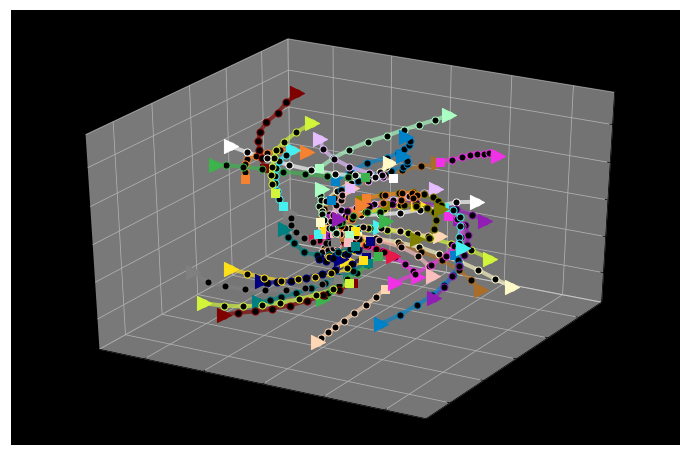

In [9]:
run_time = 10 # in seconds
num_fish = 50
arena_size = 30
arena_center = arena_size / 2.0
initial_spread = 25
fish_pos = initial_spread * np.random.rand(num_fish, 3) + arena_center - initial_spread / 2.0
clock_freqs = 1
verbose = False

distortion = generate_distortion(type='curl', n=arena_size)
environment = Environment(
    node_pos=fish_pos,
    distortion=distortion,
    prob_type='binary',
    noise_magnitude=0,
    conn_thres=10,
    verbose=verbose
)
interaction = Interaction(environment, verbose=verbose)
channel = Channel(environment)

fish = generate_fish(
    n=num_fish, 
    channel=channel, 
    interaction=interaction, 
    lim_neighbors=[math.inf,math.inf],
    neighbor_weights=1.0,
    fish_max_speeds=1,
    clock_freqs=clock_freqs,
    verbose=verbose
)
channel.set_nodes(fish)

observer = Observer(fish=fish, environment=environment, channel=channel)
run_simulation(fish=fish, observer=observer, run_time=run_time, dark=True, white_axis=False, no_legend=True)

### Aggregation and migration
The robots start dispersed and gather first to then migrate from left to right. This is similar to salmons who come from different places in the ocean and then swim up their rivers of origin for reproduction.

Please wait patiently 20 seconds. Thanks.
It's time to say bye bye!


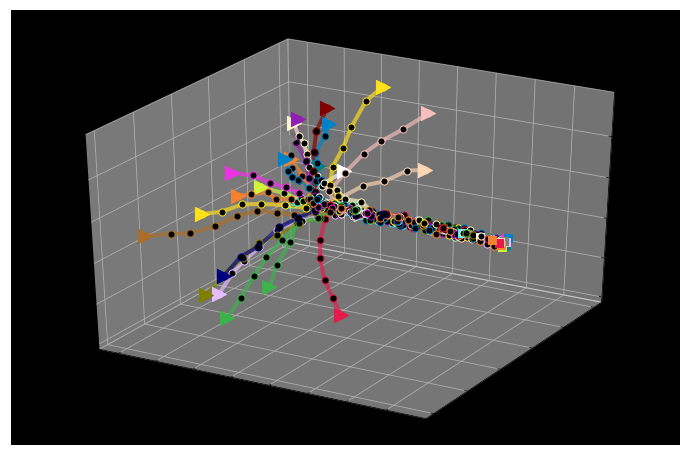

In [13]:
from events import Move

run_time = 20 # in seconds
num_fish = 25
arena_size = 30
arena_center = arena_size / 2.0
initial_spread = 10
fish_pos = np.zeros((num_fish,3))
fish_pos[:,0] = np.random.rand(num_fish) * initial_spread
fish_pos[:,1] = np.random.rand(num_fish) * initial_spread + arena_center - initial_spread/2
fish_pos[:,2] = np.random.rand(num_fish) * initial_spread
clock_freqs = 1
verbose = False

distortion = generate_distortion(type='none', n=arena_size)
environment = Environment(
    node_pos=fish_pos,
    distortion=distortion,
    prob_type='binary',
    noise_magnitude=0.2,
    conn_thres=10,
    verbose=verbose
)
interaction = Interaction(environment, verbose=verbose)
channel = Channel(environment)

fish = generate_fish(
    n=num_fish, 
    channel=channel, 
    interaction=interaction, 
    lim_neighbors=[math.inf,math.inf],
    neighbor_weights=1.0,
    fish_max_speeds=1,
    clock_freqs=clock_freqs,
    verbose=verbose
)
channel.set_nodes(fish)

observer = Observer(fish=fish, environment=environment, channel=channel)

migrate = Move(1,0)
observer.instruct(event=migrate, rel_clock=0, fish_all=True)

run_simulation(fish=fish, observer=observer, run_time=run_time, dark=True, white_axis=False, no_legend=True, no_star=True)